Install the `ultralytics` library.

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.6/873.6 kB 9.7 MB/s eta 0:00:00


Create a directory named `geometricShapes` and add the folders `model` and `images`, copied from GitHub.

The `best.pt` file in the `model` folder was generated by training the network using this other Colab:

https://colab.research.google.com/drive/12Tbr06EXiZbHfuUhBymnrOsjyUDB9AUW

The `data.yaml` file in the same folder was generated using Roboflow, as explained in the Colab linked above.

The images in the `images` folder were not used in this training and will be useful for testing the trained model.

In [2]:
!mkdir /content/geometricShapes
!wget https://github.com/fzampirolli/morph/raw/main/Expanded/images.zip -O images.zip
!unzip images.zip -d /content/geometricShapes/

!wget https://github.com/fzampirolli/morph/raw/main/Expanded/model.zip -O model.zip
!unzip model.zip -d /content/geometricShapes/

--2024-09-22 13:48:42--  https://github.com/fzampirolli/morph/raw/main/Expanded/images.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fzampirolli/morph/main/Expanded/images.zip [following]
--2024-09-22 13:48:42--  https://raw.githubusercontent.com/fzampirolli/morph/main/Expanded/images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104281 (102K) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>] 101.84K  --.-KB/s    in 0.004s  

2024-09-22 13:48:42 (22.2 MB/s) - ‘images.zip’ saved [104281/104281]

Archive:  images.zip
   creating: /content/geometr

Loads the class labels.

In [3]:
def load_classes():
    #with open('/data.yaml', 'r') as config_file:
    with open('/content/geometricShapes/model/data.yaml', 'r') as config_file:
        config_data = config_file.read()

    class_names_start = config_data.find("names: [") + len("names: [")
    class_names_end = config_data.find("]", class_names_start)
    class_names_str = config_data[class_names_start:class_names_end]
    class_names = [name.strip().strip("'") for name in class_names_str.split(",")]

    return class_names

nomeClasses = load_classes()

Generate bounding boxes with random colors.

In [4]:
import random

def class_colors(names):
    return {name: (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for name in names}

color = class_colors(nomeClasses)

In [5]:
# Path to the folder containing the images
image_folder = '/content/geometricShapes/images'

# Supported image extensions
image_extensions = ['.jpeg', '.jpg', '.png']


Load the trained YOLOv8 model

In [9]:
from ultralytics import YOLO

model = YOLO('/content/geometricShapes/model/best.pt')

Function to detect objects and draw bounding boxes

In [10]:
import os
import cv2

def process_image(image_path):
    image = cv2.imread(image_path)
    results = model(image)
    return image, results


# Function to draw bounding boxes on an image
def draw_boxes(image, results):
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
            conf = box.conf[0]  # Confidence
            cls = int(box.cls[0])  # Class
            label = f'{model.names[cls]} {conf:.2f}'  # Label with class and confidence

            className = nomeClasses[cls]

            # Draw the bounding box
            cv2.rectangle(image, (x1, y1), (x2, y2), color[className], 1)
            # Draw the label
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color[className], 1)

    return image

# List all images in the folder
images = [f for f in os.listdir(image_folder) if os.path.splitext(f)[-1].lower() in image_extensions]

Performs inference on all images in the `images` folder and displays the results.



0: 640x640 1 circle, 1 cross, 1 ellipse, 1 heptagon, 1 hexagon, 1 pentagon, 1 square, 1 star, 1 triangle, 259.8ms
Speed: 13.3ms preprocess, 259.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


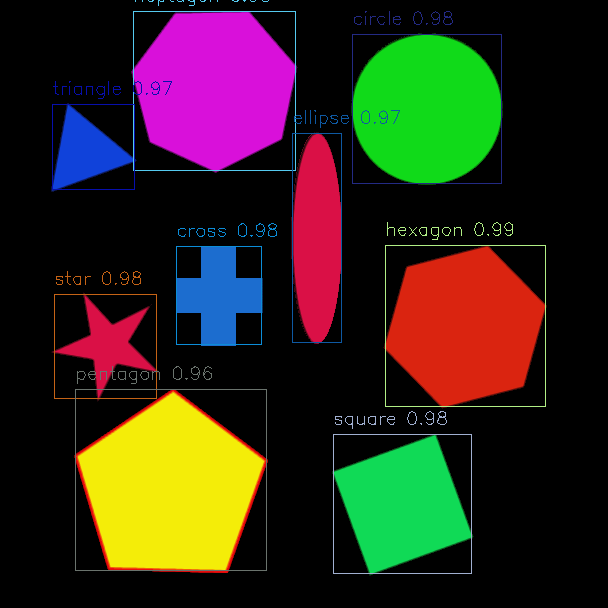


0: 640x640 1 circle, 1 cross, 1 ellipse, 1 heptagon, 1 hexagon, 1 pentagon, 1 square, 1 star, 1 triangle, 257.3ms
Speed: 8.9ms preprocess, 257.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


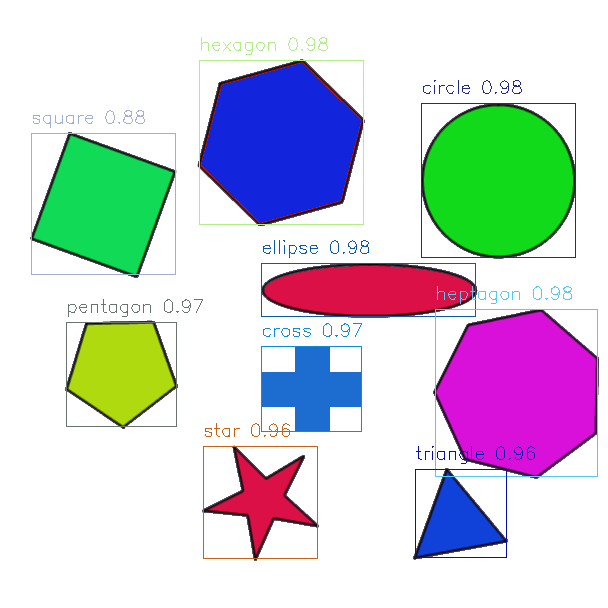


0: 640x640 1 circle, 1 cross, 1 ellipse, 1 heptagon, 1 hexagon, 1 pentagon, 1 square, 1 star, 1 triangle, 235.8ms
Speed: 8.2ms preprocess, 235.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


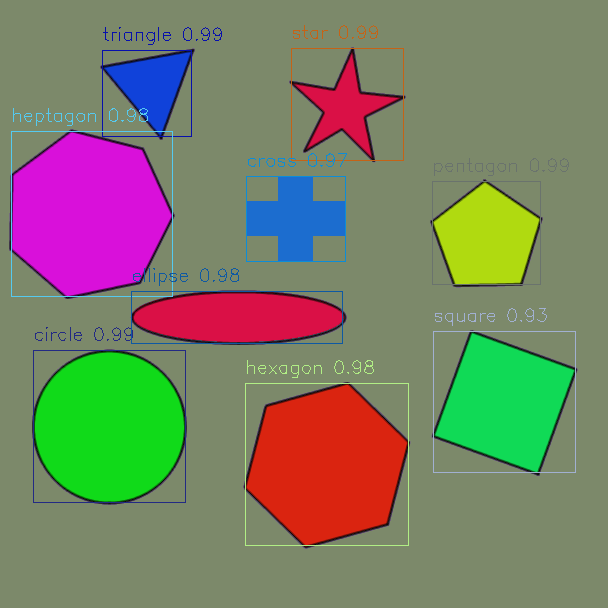


0: 640x640 1 circle, 1 cross, 1 ellipse, 1 heptagon, 1 hexagon, 1 pentagon, 1 square, 1 star, 1 triangle, 248.6ms
Speed: 10.0ms preprocess, 248.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


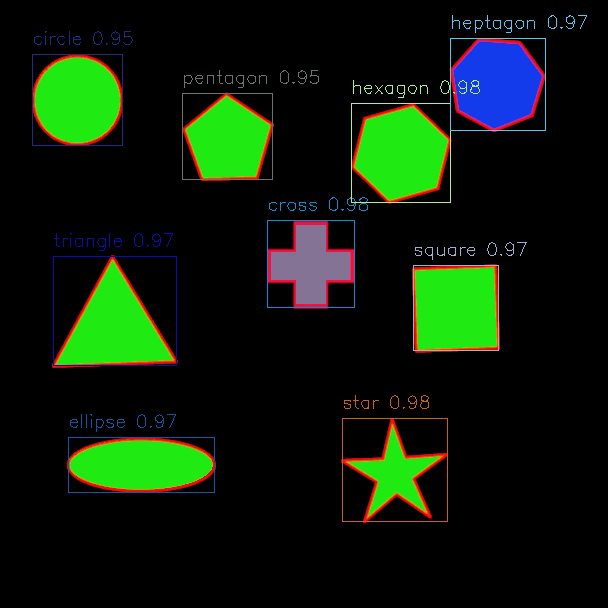

In [11]:
from google.colab.patches import cv2_imshow

# Process each image
for image_name in images:
    image_path = os.path.join(image_folder, image_name)
    image, results = process_image(image_path)

    # Draw bounding boxes on the image
    image_with_boxes = draw_boxes(image, results)

    # Display the image with bounding boxes
    #cv2.imshow('Result', image_with_boxes)
    cv2_imshow(image_with_boxes)
